In [1]:
import seaborn as sbn
import numpy as np
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

In [5]:
T = np.linspace(0,1,101)
ql = 1
qh = 2
fb = 0.0
fs = 0.0
wb = 0.0
ws = 0.0
tol = 0.001

## Agglomeration

### Buyer Fraction Figure

In [132]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.2
T1 = pl/ql*np.ones(101)
T2 = (p-pl)/(qh-ql)
T3 = [max([0,pi/qh, (pi-pl)/(qh-ql)]) for pi in p]
T4 = [min(pi/qh, pl/ql) for pi in p]

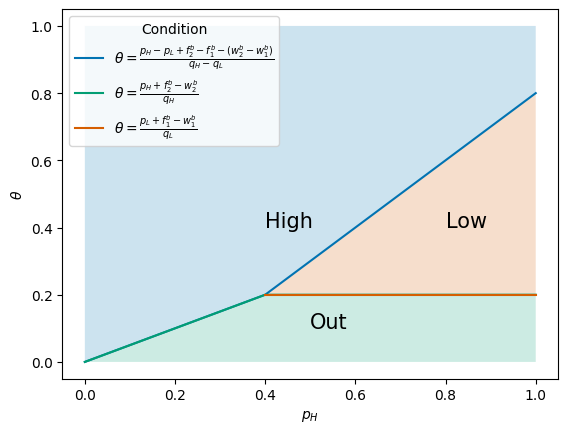

In [133]:
sbn.set_palette("colorblind6")
fig1 = sbn.lineplot(x = p, y = T3, label = r"$\theta = \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}$").fill_between(p, T3, y2 = 1,  alpha = 0.2)
sbn.lineplot(x = p, y = T4, label = r"$\theta = \frac{p_H+f_2^b-w_2^b}{q_H}$").fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(x = p[40:], y = T1[40:], label = r"$\theta = \frac{p_L+f_1^b-w_1^b}{q_L}$").fill_between(p[40:], T1[40:], y2 = T2[40:], alpha = 0.2)
plt.legend(loc='upper left', title='Condition')
sbn.lineplot().set(xlabel = r'$p_H$', ylabel = r'$\theta$')
sbn.lineplot().text(0.40, 0.4, "High", fontsize = 15)
sbn.lineplot().text(0.5, 0.1, "Out", fontsize = 15)
sbn.lineplot().text(0.8, 0.4, "Low", fontsize = 15)
plt.savefig("segmentation_buyers_ph.png")
plt.show()

In [134]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.2
T1 = p/ql*np.ones(101)
T2 = (ph-p)/(qh-ql)
T3 = [max([0,ph/qh, (ph-pi)/(qh-ql)]) for pi in p]
T4 = [min(ph/qh, pi/ql) for pi in p]

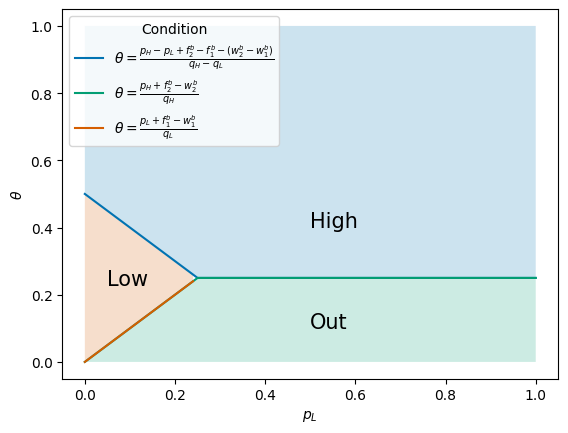

In [135]:
sbn.set_palette("colorblind6")
fig1 = sbn.lineplot(x = p, y = T3, label = r"$\theta = \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}$").fill_between(p, T3, y2 = 1,  alpha = 0.2)
sbn.lineplot(x = p, y = T4, label = r"$\theta = \frac{p_H+f_2^b-w_2^b}{q_H}$").fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(x = p[:25], y = T1[:25], label = r"$\theta = \frac{p_L+f_1^b-w_1^b}{q_L}$").fill_between(p[:25], T1[:25], y2 = T2[:25], alpha = 0.2)
plt.legend(loc='upper left', title='Condition')
sbn.lineplot().set(xlabel = r'$p_L$', ylabel = r'$\theta$')
sbn.lineplot().text(0.5, 0.4, "High", fontsize = 15)
sbn.lineplot().text(0.5, 0.1, "Out", fontsize = 15)
sbn.lineplot().text(0.05, 0.23, "Low", fontsize = 15)
plt.savefig("segmentation_buyers_pl.png")
plt.show()

## Seller Profit

\begin{align}
    \overline{\theta} = \max\left\lbrace \frac{p_H+f_2^b-w_2^b}{q_H}, \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}\right\rbrace  \\
    \underline{\theta} = \max\left\lbrace 0,\frac{p_L+f_1^b-w_1^b}{q_L}\right\rbrace
\end{align}

## Seller price setting strategies

In [6]:
## k1b = f1b-w1b
## k2b = f2b-w2b
def overline_theta(pl, ph, k1b, k2b):
  return max((ph+k2b)/qh, (ph-pl+k2b-k1b)/(qh-ql))
def underline_theta(pl, ph, k1b, k2b):
  return max(0, (pl+k1b)/ql)

In [7]:
## k1s = f1s-w1s
## k2s = f2s-w2s
def pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return (1-overline_theta(pl,ph, k1b,k2b))*(ph-ch)-k2s
def pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return (overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*(pl-cl)-k1s

In [8]:
## k1s = f1s-w1s
## k2s = f2s-w2s
def m_pih(ph,pl, k1b, k2b, cl,ch, k1s, k2s):
  return -(1-overline_theta(pl,ph, k1b,k2b))*(ph-ch)+k2s
def m_pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return -(overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*(pl-cl)+k1s

In [9]:
def find_eq(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  pln = 100
  phn = 100
  iter = 0
  while np.sqrt((pl-pln)**2 +(ph - phn)**2)>=tol:
    pln = pl
    phn = ph
    pl = minimize_scalar(m_pil, args = (phn, k1b, k2b, cl,ch, k1s, k2s), bounds=(0, 1), method='bounded').x
    ph = minimize_scalar(m_pih, args = (pln, k1b, k2b, cl,ch, k1s, k2s), bounds=(0, 1), method='bounded').x
    iter += 1
    if iter >= 100:
      print("Buy eq. not found")
      break
  return pl, ph

In [10]:
def plot_sel_eq(pl, ph, k1b, k2b, cl,ch, k1s, k2s):
  br_h = []
  ben_h = []
  p = np.linspace(0,1,501)
  for pk in p:
    Pih = [pih(pk,pr,k1b, k2b, cl,ch, k1s, k2s) for pr in p]
    ben_h.append(max(Pih))
    br_h.append(p[Pih.index(max(Pih))])
  br_l = []
  ben_l = []
  for pk in p:
    Pil = [pil(pr,pk,k1b, k2b, cl,ch, k1s, k2s) for pr in p]
    ben_l.append(max(Pil))
    br_l.append(p[Pil.index(max(Pil))])
  #Best Response Functions
  sbn.lineplot(x = p, y = br_h, label = r"$BR_H(p_L)$")
  sbn.lineplot(x = br_l, y = p, label = r"$BR_L(p_H)$")
  sbn.scatterplot(x = [pl], y = [ph], label = "Eq. price").set(title = 'Best Response', xlabel = r"$p_L$", ylabel = r"$p_H$")
  plt.savefig("best_response_sel")
  fig1 = plt.show()
  #Rational Sellers
  sbn.lineplot(x = p, y = [pih(br_l[i], p[i], k1b,k2b,cl, ch, k1s, k2s) for i in range(0, 501)], label = r"$\pi_H(BR_L(p_H), P_H)$")
  sbn.lineplot(x = p, y = [pil(p[i], br_h[i], k1b,k2b,cl, ch, k1s, k2s) for i in range(0, 501)], label = r"$\pi_L(p_L, BR_H(p_L))$").set(title = 'Profit', xlabel = r"$p_L/ p_H$", ylabel = r"$\pi$")
  sbn.lineplot(x = [pl, pl], y = [-0.5,0.4], estimator = None, color = 'black', linestyle = 'dashed')
  sbn.lineplot(x = [ph, ph], y = [-0.5,0.4], estimator = None,color = 'black', linestyle = 'dashed')
  plt.savefig("rational_seller")
  plt.show()
  return fig1

In [11]:
def plot_buy_eq(pl, ph, k1b, k2b, cl,ch, k1s, k2s):
  Th = np.linspace(0,1,101)
  V1L = Th*ql - pl-k1b
  V2H = Th*qh - ph-k2b
  th_ov = overline_theta(pl, ph, k1b, k2b)
  th_un = underline_theta(pl, ph, k1b, k2b)
  sbn.lineplot(x = Th, y = V1L, label = r"$V_{1,L}^\theta$")
  sbn.lineplot(x = Th, y = V2H, label = r"$V_{2,H}^\theta$")
  sbn.lineplot(x = Th, y = np.zeros(101), linestyle = 'dashed', color = 'black')
  sbn.lineplot(x = [th_un, th_un], y = [min(min(V1L), min(V2H)), max(max(V1L), max(V2H))]
               , estimator = None, color = 'black', linestyle = 'dashed', label = r'${\theta}$')
  sbn.lineplot(x = [th_ov, th_ov], y = [min(min(V1L), min(V2H)), max(max(V1L), max(V2H))]
               , estimator = None, color = 'black', linestyle = 'dashed', label = r'$\overline{\theta}$').set(title = 'Buyer Utility', xlabel = r"$\theta$", ylabel = r"$V^\theta$")
  plt.savefig("buy_eq")
  fig2 = plt.show()
  return fig2

In [12]:
cl = 0.0
ch = 0.0
ql = 2
qh = 3
k1b = 0.0
k2b = 0.0
k1s = 0.0
k2s = 0.0
p = np.linspace(0,1,1001)
tol = 0.0001
sbn.set_palette("colorblind6")

In [13]:
pl1 = (ql*(qh-ql+k2b+k1b)-2*qh*k1b)/(4*qh-ql)
pl1

0.2

In [14]:
ph1 = (qh*(2*(qh-ql)+k1b-2*k2b)+ql*k2b)/(4*qh-ql)
ph1

0.6

In [15]:
pl_eq, ph_eq = find_eq(0.2,0.5, k1b, k2b, cl,ch, k1s, k2s)
pl_eq, ph_eq

(0.19997427983539093, 0.5999999999999999)

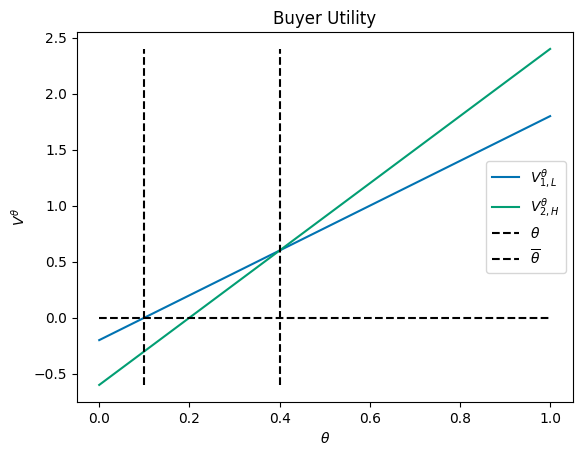

In [146]:
plot_buy_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

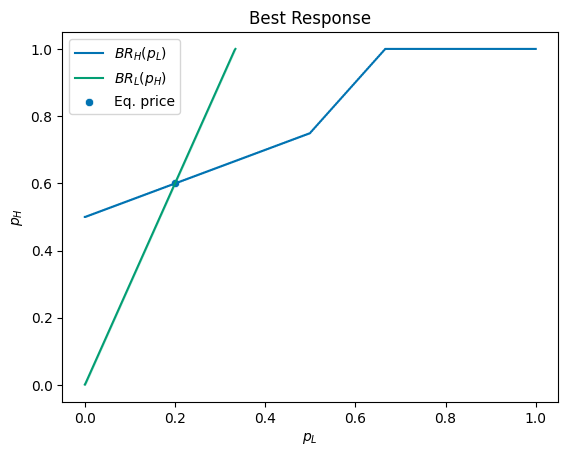

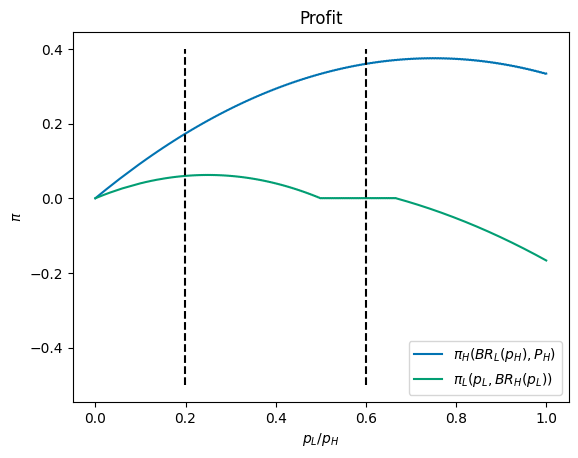

In [147]:
plot_sel_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

## Platform Profit

$\pi_1 = (I_L)f_1^s + (\overline{\theta}-\underline{\theta})f_1^b-F(w_1^b, w_1^s)$

$\pi_2 = (I_H)f_2^s + (1-\overline{\theta})f_2^b-F(w_2^b, w_2^s)$

## With Platform Benefits


In [41]:
def F1(w1b,w1s):
  return (w1b**2+w1s**2)
def F2(w2b,w2s):
  return (w2b**2+w2s**2)

In [42]:
def m_pi1(x, cl,ch, k2):
  f1b, f1s, w1b, w1s = x[0], x[1], x[2], x[3]
  f2b, f2s, w2b, w2s = k2[0], k2[1], k2[2], k2[3]
  k1b = f1b - w1b
  k2b = f2b - w2b
  k1s = f1s - w1s
  k2s = f2s - w2s
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0:
    return -f1s-(overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*f1b+F1(w1b,w1s)
  else:
    return 0.0
def m_pi2(x, cl,ch, k1):
  f2b, f2s, w2b, w2s = x[0], x[1], x[2], x[3]
  f1b, f1s, w1b, w1s = k1[0], k1[1], k1[2], k1[3]
  k1b = f1b - w1b
  k2b = f2b - w2b
  k1s = f1s - w1s
  k2s = f2s - w2s
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0:
    return -f2s-(1-overline_theta(pl,ph, k1b, k2b))*f2b+F2(w2b,w2s)
  else:
    return 0.0

In [43]:
def find_plat_eq(k1,k2, cl,ch):
  k1n = np.array([-1, -1, 1, 1])
  k2n = np.array([-1, -1, 1, 1])
  iter = 0
  while (np.linalg.norm(k1n-k1)>tol) or (np.linalg.norm(k2n- k2)>tol):
    k1n = k1
    k2n = k2
    k1 = minimize(m_pi1, x0 = k1n, args = (cl,ch, k2n), bounds = ([-0.5,0.5], [-0.5,0.5],[0,1], [0,1]),  method = 'Nelder-Mead',
                  options = {'initial_simplex':np.array([[-1,0,0,0],[0,0,0,0], [0,-1,0,0], [0,0,0,1], [0,0,1,0]])}).x
    k2 = minimize(m_pi2, x0 = k2n, args = (cl,ch, k1n), bounds = ([-0.5,0.5], [-0.5,0.5],[0,1], [0,1]),  method = 'Nelder-Mead',
                  options = {'initial_simplex':np.array([[-1,0,0,0],[0,0,0,0], [0,-1,0,0], [0,0,0,1], [0,0,1,0]])}).x
    iter += 1
    if iter >= 50:
      print("Not")
      break
  print(iter)
  return k1,k2

In [44]:
k1, k2 = find_plat_eq(np.array([0,0,0,0]),np.array([0,0,0,0]), cl,ch)

16


In [45]:
k1,k2

(array([0.10533159, 0.0664638 , 0.        , 0.        ]),
 array([0.26325961, 0.27696641, 0.        , 0.        ]))

In [46]:
m_pi1(k1, cl,ch, k2), m_pi2(k2, cl,ch, k1)

(-0.0997274374946503, -0.41551641667404426)

In [47]:
k1b = k1[0]-k1[2]
k2b = k2[0]-k2[2]
k1s = k1[1]-k1[3]
k2s = k2[1]-k2[3]
pl_eq, ph_eq = find_eq(0,0.0, k1b, k2b, cl,ch, k1s, k2s)
pl_eq, ph_eq

(0.21049672382743773, 0.5262820987616668)

In [48]:
pih(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s),pil(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s)

(8.811136103514805e-06, 1.090170670904611e-05)

In [51]:
underline_theta(pl_eq, ph_eq, k1b, k2b), overline_theta(pl_eq, ph_eq, k1b, k2b)

(0.15791415765264466, 0.47371338896903004)

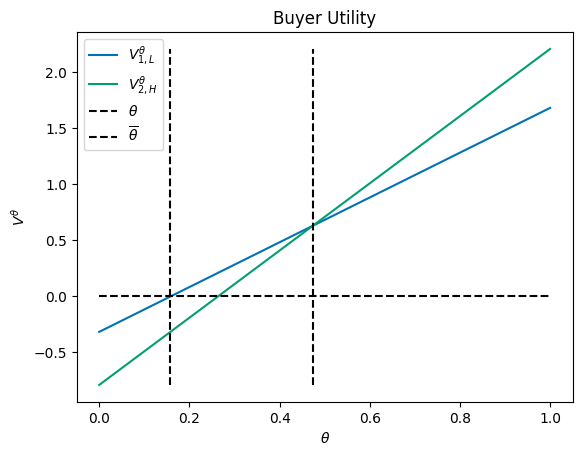

In [53]:
plot_buy_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

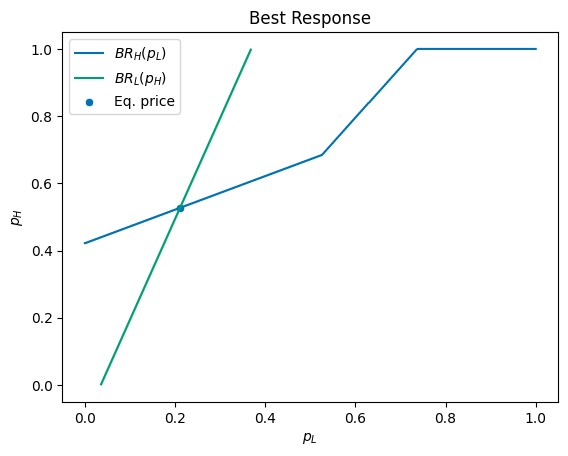

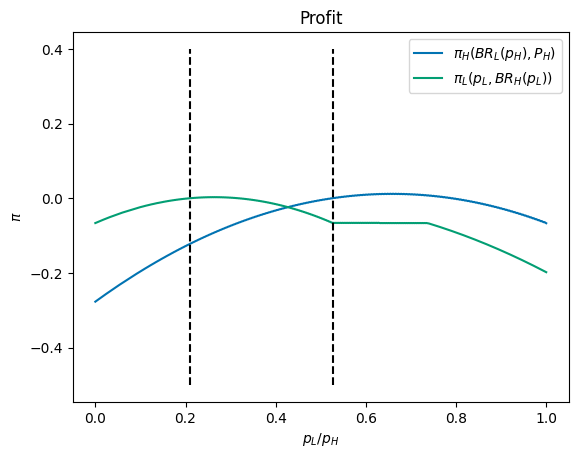

In [52]:
plot_sel_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

## Agglomeration Eq.

In [116]:
## k1b = f1b-w1b
## k2b = f2b-w2b
def overline_theta(pl, ph, k1b, k2b):
  return max((ph+k1b)/qh, (ph-pl)/(qh-ql))
def underline_theta(pl, ph, k1b, k2b):
  return max(0, (pl+k1b)/ql)

In [117]:
## k1s = f1s-w1s
## k2s = f2s-w2s
def pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return (1-overline_theta(pl,ph, k1b,k2b))*(ph-ch)-k1s
def pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return (overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*(pl-cl)-k1s

In [118]:
## k1s = f1s-w1s
## k2s = f2s-w2s
def m_pih(ph,pl, k1b, k2b, cl,ch, k1s, k2s):
  return -(1-overline_theta(pl,ph, k1b,k2b))*(ph-ch)+k1s
def m_pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return -(overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*(pl-cl)+k1s

In [119]:
def plot_buy_eq_agg(pl, ph, k1b, k2b, cl,ch, k1s, k2s):
  Th = np.linspace(0,1,101)
  V1L = Th*ql - pl-k1b
  V2H = Th*qh - ph-k1b
  th_ov = overline_theta(pl, ph, k1b, k2b)
  th_un = underline_theta(pl, ph, k1b, k2b)
  sbn.lineplot(x = Th, y = V1L, label = r"$V_{1,L}^\theta$")
  sbn.lineplot(x = Th, y = V2H, label = r"$V_{1,H}^\theta$")
  sbn.lineplot(x = Th, y = np.zeros(101), linestyle = 'dashed', color = 'black')
  sbn.lineplot(x = [th_un, th_un], y = [min(min(V1L), min(V2H)), max(max(V1L), max(V2H))]
               , estimator = None, color = 'black', linestyle = 'dashed', label = r'${\theta}$')
  sbn.lineplot(x = [th_ov, th_ov], y = [min(min(V1L), min(V2H)), max(max(V1L), max(V2H))]
               , estimator = None, color = 'black', linestyle = 'dashed', label = r'$\overline{\theta}$').set(title = 'Buyer Utility', xlabel = r"$\theta$", ylabel = r"$V^\theta$")
  plt.savefig("buy_eq_agg")
  fig2 = plt.show()
  return fig2

In [120]:
cl = 0.0
ch = 0.0
ql = 1
qh = 2
k1b = 0.0
k2b = 0.0
k1s = 0.0
k2s = 0.0
p = np.linspace(0,1,1001)
tol = 0.0001

In [125]:
((qh-ql)/(4*qh-ql))*(ql-2*k1b), ((qh-ql)/(4*qh-ql))*(2*qh-k1b)

(0.14285714285714285, 0.5714285714285714)

In [121]:
pl_eq, ph_eq = find_eq(0.2,0.5, k1b, k2b, cl,ch, k1s, k2s)
pl_eq, ph_eq

(0.14287109375, 0.5714111328125)

In [ ]:
def m_pi1(x, cl,ch, k2):
  f1b, f1s, w1b, w1s = x[0], x[1], x[2], x[3]
  f2b, f2s, w2b, w2s = k2[0], k2[1], k2[2], k2[3]
  k1b = f1b - w1b
  k2b = f2b - w2b
  k1s = f1s - w1s
  k2s = f2s - w2s
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if (pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0) & (pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0):
    return -2*f1s-(1-underline_theta(pl,ph, k1b,k2b))*f1b+F1(w1b,w1s)
  else:
    return 0.0
def m_pi2(x, cl,ch, k1):
  f2b, f2s, w2b, w2s = x[0], x[1], x[2], x[3]
  f1b, f1s, w1b, w1s = k1[0], k1[1], k1[2], k1[3]
  k1b = f1b - w1b
  k2b = f2b - w2b
  k1s = f1s - w1s
  k2s = f2s - w2s
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0:
    return -f2s-(1-overline_theta(pl,ph, k1b, k2b))*f2b+F2(w2b,w2s)
  else:
    return 0.0

In [ ]:
k1 = minimize(m_pi1, x0 = k1, args = (cl,ch, k2), bounds = ([-1,1], [-1,1],[0,1], [0,1]),  method = 'Nelder-Mead',
                  options = {'initial_simplex':np.array([[-1,0,0,0],[0,0,0,0], [0,-1,0,0], [0,0,0,1], [0,0,1,0]])}).x

In [ ]:
k1b = k1[0]-k1[2]
k1s = k1[1]-k1[3]
pl_eq, ph_eq = find_eq(0,0.0, k1b, k2b, cl,ch, k1s, k2s)
pl_eq, ph_eq

(0.017650536959149005, 0.5088101883717051)

In [ ]:
pih(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s),pil(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s)

(0.25828039045985757, 3.1985659526730104e-07)

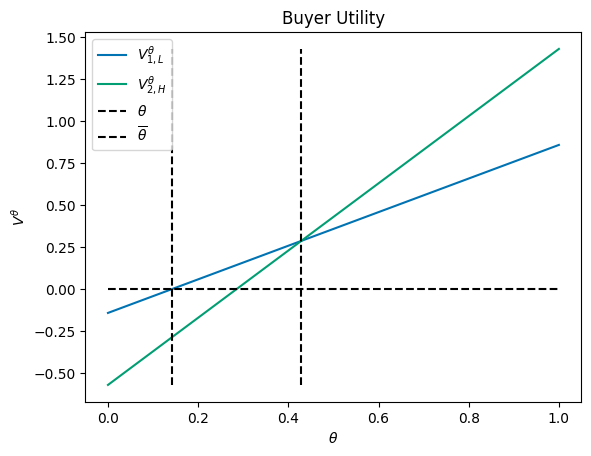

In [103]:
plot_buy_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)